Query encoder:
* Encoder query text for text index using GPT embedding
* Encoder query text for image index using CLIP embedding

Steps:
1. Download texts and images raw files for Wikipedia articles
2. Build text index for vector store using GPT embeddings
3. Build image index for vector store using CLIP embeddings
4. Retrieve relevant text and image simultaneously using different query encoding embeddings and vector stores

## Setup

In [ ]:
%pip install -q llama-index-vector-stores-qdrant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.2/267.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.0 which is incompatible.
tensorflow-metadata 1.13.1 requires prot

In [ ]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-pzkz6s58
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-pzkz6s58
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=89f14f446f4b9b597d768209c7fe3f2320f2afde19f0124725551d58056680fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-65lr6fu4/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!pip install llama-index-embeddings-clip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [ ]:
!pip install python-dotenv

In [ ]:
import os
import openai
import sys
import pandas as pd
sys.path.append('../..')

# Load environment
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

# Set the OpenAI API key
openai.api_key  = os.environ['OPENAI_API_KEY']

## Load and Download Multi-Modal datasets including texts and images from Wikipedia
Parse wikipedia articles and save into local folder

In [ ]:
from pathlib import Path
import requests

# list wiki titles for the topic
wiki_titles = [
    "RoboCop",
    "Labour Party (UK)",
    "SpaceX",
    "OpenAI",
]

# define path to store the data
data_path = Path("data_wiki")

for title in wiki_titles:
  # get request to extract data
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json() # convert to json

    # extract the first page content
    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    # checking directory to store data
    if not data_path.exists():
        Path.mkdir(data_path)

    # save the data
    with open(data_path / f"{title}.txt", "w") as fp:
        fp.write(wiki_text)

## Parse Wikipedia Images and texts. Load into local folder

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=8fe9404ae9e57ed3f436794e8b4f5755a768094cde63e3262bc87aa8584a2a3d
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
import urllib.request

# define path where the data saved
image_path = Path("data_wiki")
image_uuid = 0 #identifier for each image
# Dictionary to store data
image_metadata_dict = {}
MAX_IMAGES_PER_WIKI = 30

# define title
wiki_titles = [
    "RoboCop",
    "Labour Party (UK)",
    "SpaceX",
    "OpenAI",
]

# create folder for images only
if not image_path.exists():
    Path.mkdir(image_path)


# Download images for wiki pages
# Assing UUID for each image
for title in wiki_titles:
    images_per_wiki = 0
    print(title)
    try:
        page_py = wikipedia.page(title)
        list_img_urls = page_py.images
        for url in list_img_urls:
            if url.endswith(".jpg") or url.endswith(".png"):
                image_uuid += 1
                image_file_name = title + "_" + url.split("/")[-1]

                # img_path could be s3 path pointing to the raw image file in the future
                image_metadata_dict[image_uuid] = {
                    "filename": image_file_name,
                    "img_path": "./" + str(image_path / f"{image_uuid}.jpg"),
                }
                urllib.request.urlretrieve(
                    url, image_path / f"{image_uuid}.jpg"
                )
                images_per_wiki += 1
                # Limit the number of images downloaded per wiki page to 15
                if images_per_wiki > MAX_IMAGES_PER_WIKI:
                    break
    except:
        print(str(Exception("No images found for Wikipedia page: ")) + title)
        continue

RoboCop
Labour Party (UK)
No images found for Wikipedia page: Labour Party (UK)
SpaceX
No images found for Wikipedia page: SpaceX
OpenAI
No images found for Wikipedia page: OpenAI


## Build Multi Modal Vector Store using Text and Image embeddings under different collections

In [ ]:
import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store by initialize the Qdrant vector db
client = qdrant_client.QdrantClient(path="qdrant_d_0")

# create collection for each data type
text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)

# create storage to manage vector store
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# read doc from the local directory
documents = SimpleDirectoryReader("./data_wiki/").load_data()

# create multimodal index
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 113MiB/s]


### Build a separate CLIP image embedding index under a differnt collection `wikipedia_img`

In [ ]:
# function to plot result image
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

## Test

In [ ]:
# query to test
test_query = "what is the Labour Party?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5) # generate by similarity
retrieval_results = retriever.retrieve(test_query) # retreve and store the result

In [ ]:
retrieval_results

[NodeWithScore(node=TextNode(id_='ae85c0a0-d0d2-4bdd-9ead-d3d51f528aaa', embedding=None, metadata={'file_path': '/content/data_wiki/Labour Party (UK).txt', 'file_name': 'Labour Party (UK).txt', 'file_type': 'text/plain', 'file_size': 49155, 'creation_date': '2024-12-03', 'last_modified_date': '2024-12-03'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='2336cbbd-4699-4f40-8d1d-4d6f8474138c', node_type='4', metadata={'file_path': '/content/data_wiki/Labour Party (UK).txt', 'file_name': 'Labour Party (UK).txt', 'file_type': 'text/plain', 'file_size': 49155, 'creation_date': '2024-12-03', 'last_modified_date': '2024-12-03'}, hash='b81fecd9907a2764e56c752326daa9c4ead236de3933953f1fc869b5e7866caa'), <NodeRelati

**Node ID:** ae85c0a0-d0d2-4bdd-9ead-d3d51f528aaa<br>**Similarity:** 0.8952448290472939<br>**Text:** The Labour Party is a political party in the United Kingdom that sits on the centre-left of the political spectrum. The party has been described as an alliance of social democrats, democratic socia...<br>

**Node ID:** f08a9b60-2ba5-49ad-b9c0-41404b079c6d<br>**Similarity:** 0.8755246645233522<br>**Text:** == Constitution and structure ==

The Labour Party is a membership organisation consisting of individual members and constituency Labour parties, affiliated trade unions, socialist societies and th...<br>

**Node ID:** 1771dbe4-5cfc-4025-91c7-79d52f771ae2<br>**Similarity:** 0.8713339934514398<br>**Text:** === Trade union link ===

The Trade Union and Labour Party Liaison Organisation is the co-ordinating structure that supports the policy and campaign activities of affiliated union members within th...<br>

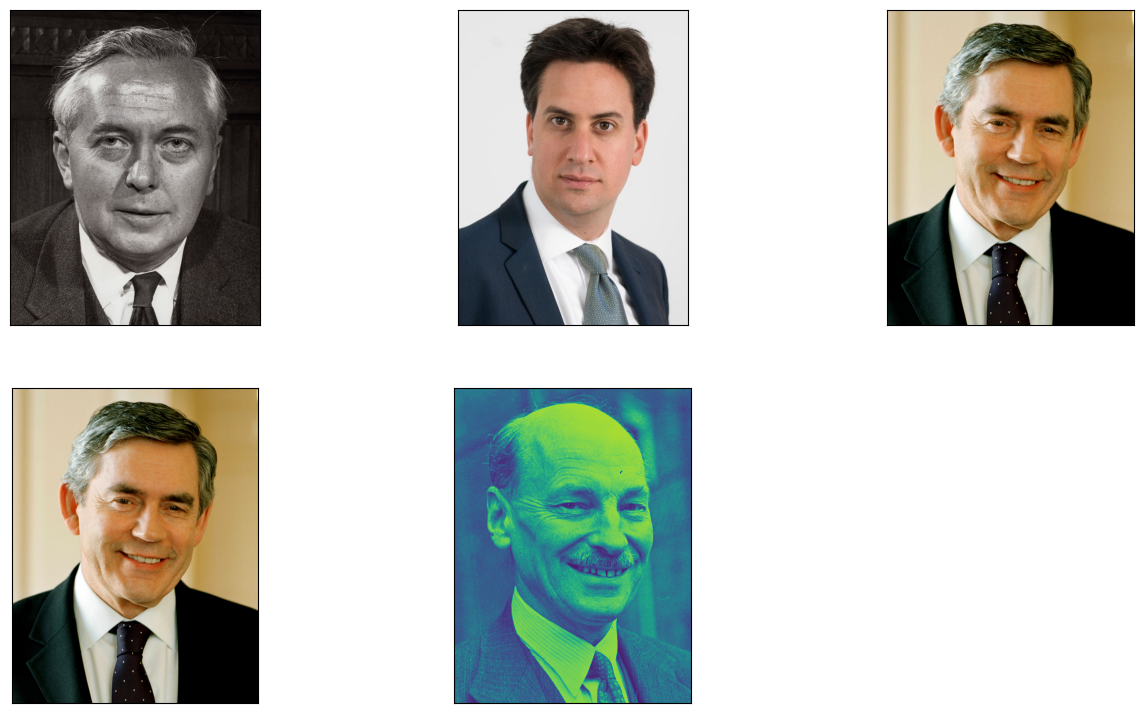

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

# list to store retrieved image
retrieved_image = []

# looop to get retrieval result
for res_node in retrieval_results:
  # check if the result containing image
    if isinstance(res_node.node, ImageNode):
      # if yes -> add to the retrieved_image
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
      # if not -> display the source node
        display_source_node(res_node, source_length=200)

# display result
plot_images(retrieved_image)

**Node ID:** fbf131e1-fb57-4a77-ab70-9d29b1a36ae3<br>**Similarity:** 0.8727123779569093<br>**Text:** RoboCop is a 1987 American science fiction action film directed by Paul Verhoeven and written by Edward Neumeier and Michael Miner. The film stars Peter Weller, Nancy Allen, Daniel O'Herlihy, Ronny...<br>

**Node ID:** ab5943e3-1949-4374-977d-94c5d2813df1<br>**Similarity:** 0.8694838020723704<br>**Text:** === Development ===

The first draft of the script, RoboCop: The Future of Law Enforcement, was given to industry friends and associates in early 1985. A month later, Neumeier and Miner had two off...<br>

**Node ID:** 02d39068-7bae-456d-8e5e-7b4098cfa63e<br>**Similarity:** 0.8646268762481375<br>**Text:** == Cast ==

Peter Weller as Alex Murphy / RoboCop: A Detroit police officer murdered in the line of duty and revived as a cyborg
Nancy Allen as Anne Lewis: A tough and loyal police officer
Daniel O...<br>

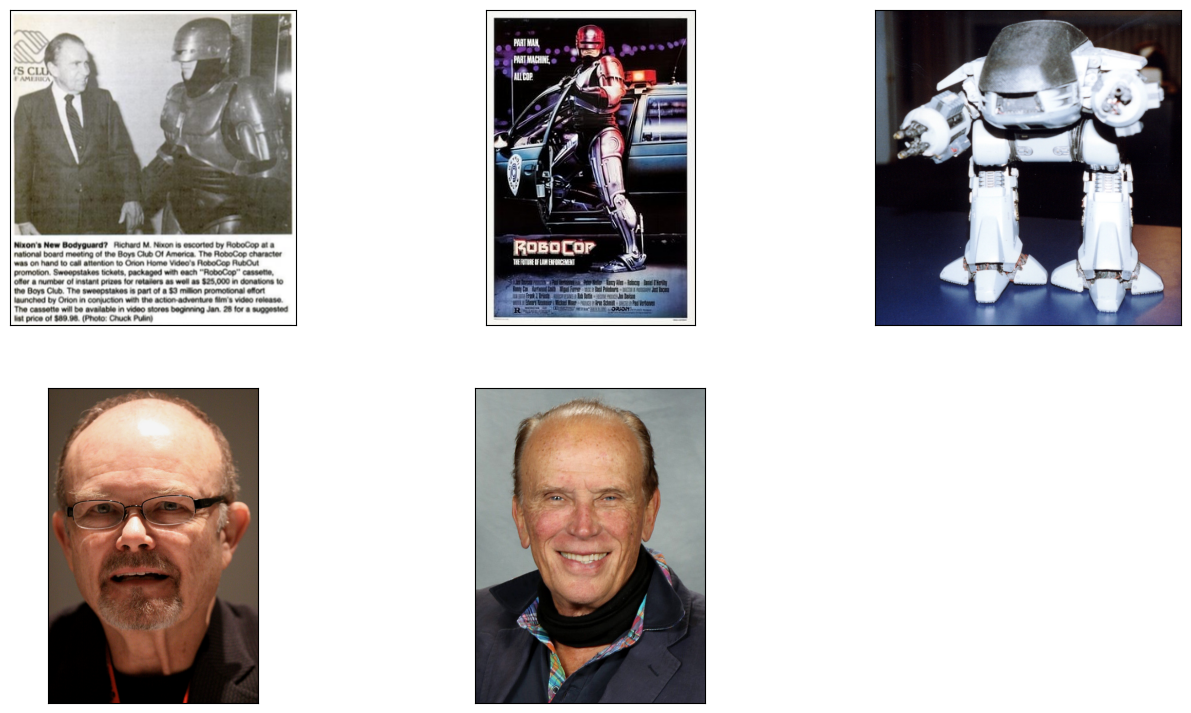

In [ ]:
test_query = "Who created RoboCop?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** 7c141b82-85bf-4cc7-8ec8-28cbcc700638<br>**Similarity:** 0.8647081523201676<br>**Text:** == Strategy ==
In the early years before his 2018 departure, Musk posed the question: "What is the best thing we can do to ensure the future is good? We could sit on the sidelines or we can encoura...<br>

**Node ID:** 32953726-77c7-4da2-acdb-488429560646<br>**Similarity:** 0.8634640585055633<br>**Text:** ==== RoboSumo ====
Released in 2017, RoboSumo is a virtual world where humanoid metalearning robot agents initially lack knowledge of how to even walk, but are given the goals of learning to move a...<br>

**Node ID:** a3eb0fe9-9405-427d-8c12-e73222fe8385<br>**Similarity:** 0.8583039171311593<br>**Text:** == History ==


=== 2015–2018: Non-profit beginnings ===

In December 2015, OpenAI was founded by Sam Altman, Elon Musk, Ilya Sutskever, Greg Brockman, Trevor Blackwell, Vicki Cheung, Andrej Karpat...<br>

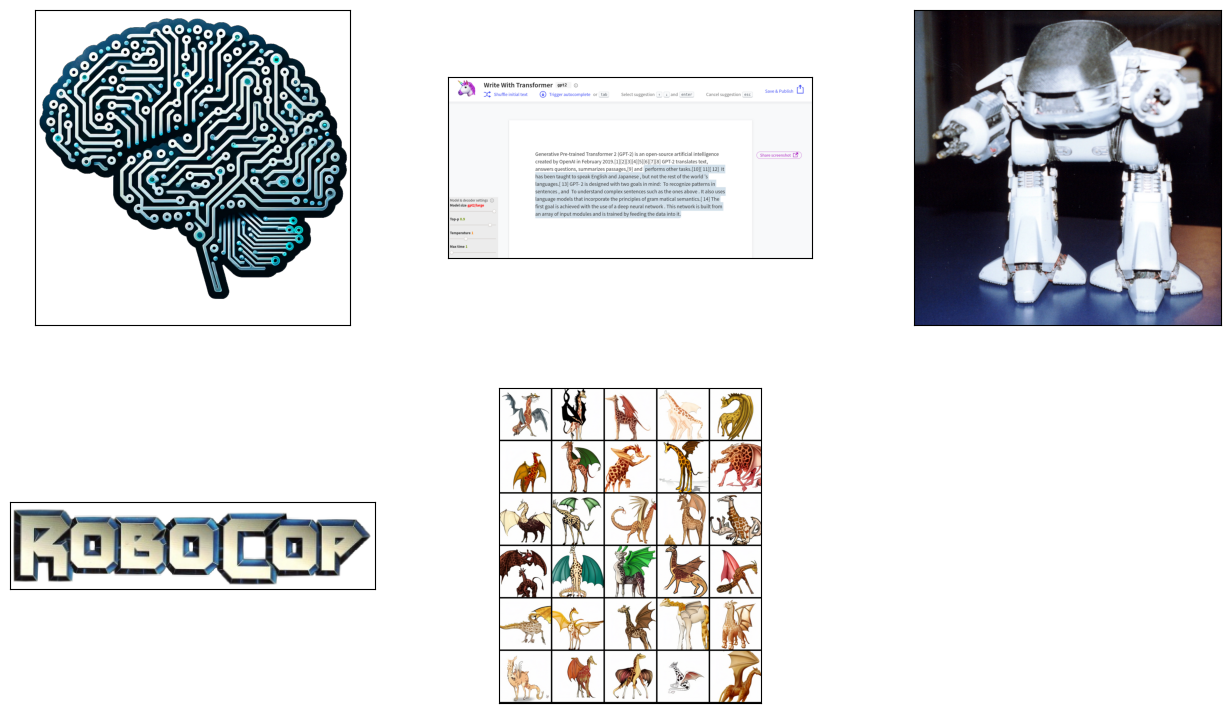

In [ ]:
test_query = "What does OpenAI do?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** 886dcdb8-3cc2-494c-9821-74235f11b2d8<br>**Similarity:** 0.7682320332368597<br>**Text:** Space Exploration Technologies Corp., commonly referred to as SpaceX, is an American space technology company headquartered at the SpaceX Starbase near Brownsville, Texas. Since its founding in 200...<br>

**Node ID:** 28c4e8b6-cb3b-4289-abf2-22b9d60a45ad<br>**Similarity:** 0.7630736214623928<br>**Text:** === Other ===
In July 2018, Musk arranged for his employees to build a mini-submarine to assist the rescue of children stuck in a flooded cavern in Thailand. Richard Stanton, leader of the internat...<br>

**Node ID:** f6e2bd36-06fe-4f4c-a327-13a3ee412b3b<br>**Similarity:** 0.7621857201305567<br>**Text:** === Autonomous spaceport drone ships ===

SpaceX routinely returns the first stage of Falcon 9 and Falcon Heavy rockets after orbital launches. The rocket lands at a predetermined landing site usin...<br>

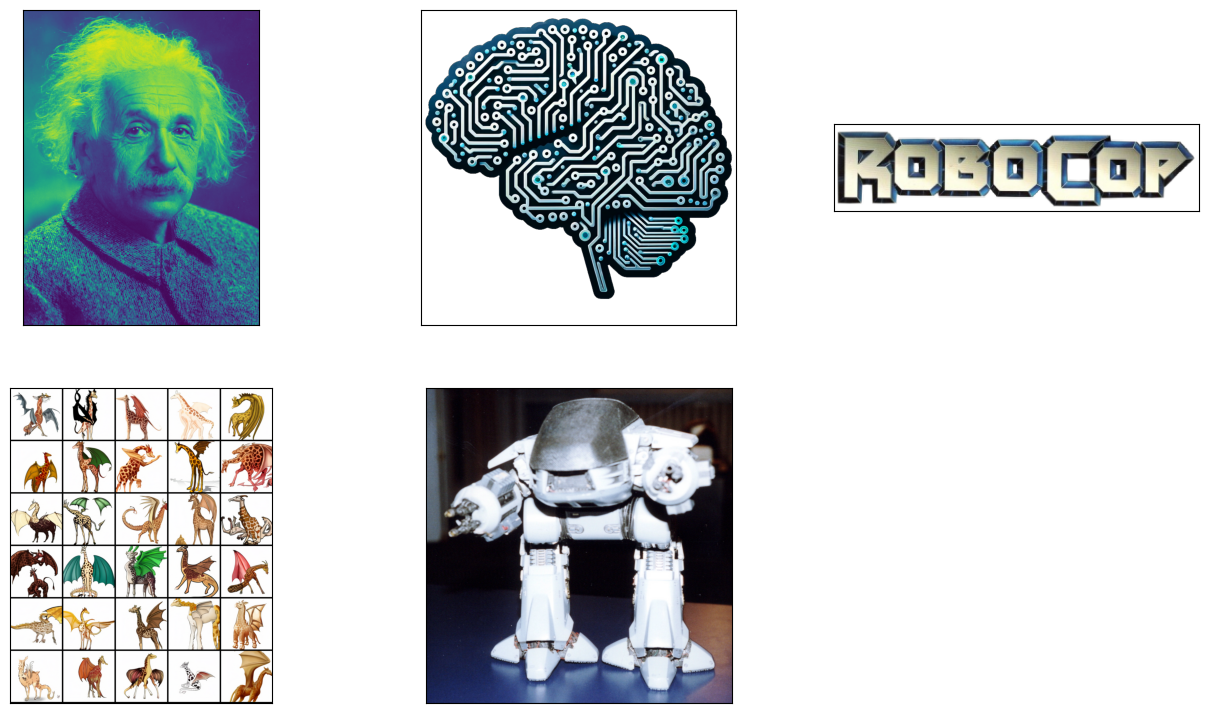

In [ ]:
test_query = "which company makes Tesla"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)